<a href="https://colab.research.google.com/github/marinagisen/atomicphysicsKG/blob/main/KG_Rubidium_v1_0411.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The data is in CSV format. This is a first try for the generated data using ChatGPT-4 on rubidum properties

In [59]:
import csv
import networkx as nx
import matplotlib.pyplot as plt
import git
from git import Repo

In [2]:
# from google.colab import files
# uploaded = files.upload()

Saving Atomic_Physics_DB_0411.csv to Atomic_Physics_DB_0411.csv


In [62]:
!git clone "https://github.com/marinagisen/atomicphysicsKG.git"

fatal: destination path 'atomicphysicsKG' already exists and is not an empty directory.


In [63]:
file_path = "/content/atomicphysicsKG/Knowledge Base csv/Atomic_Physics_DB_0411.csv"

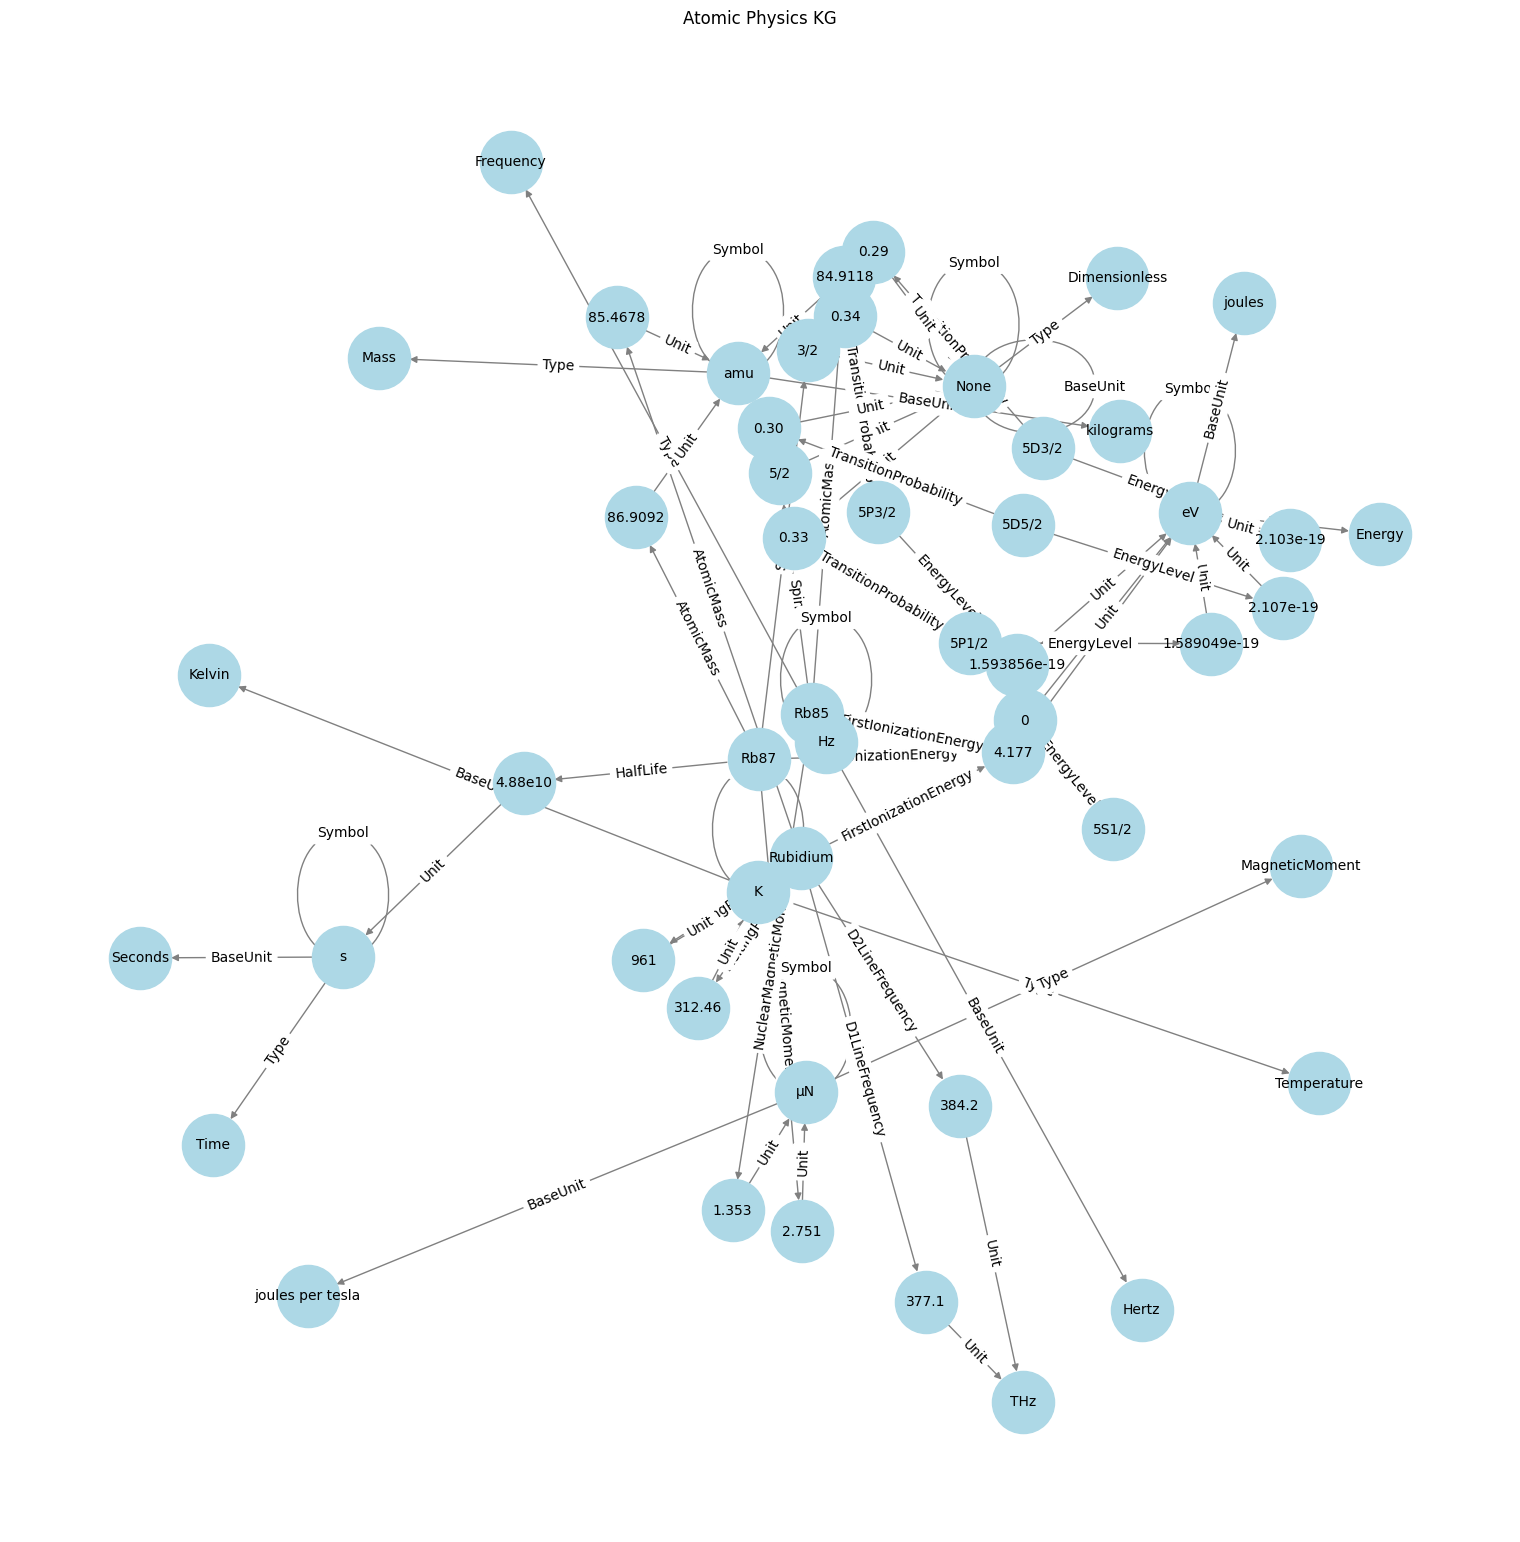

In [65]:
#Initialize the knowledge graph

G = nx.MultiDiGraph()

with open(file_path, 'r') as file:
  reader = csv.reader(file)
  next(reader) #skip header if present

  for row in reader:
    if len(row) < 1:
      continue #skip incomplete rows

    #specify which row is what
    subject, predicate, obj = row[0], row[1], row[2]

    #add nodes and edges based on row content
    G.add_node(subject, label=subject)
    G.add_node(obj,label = obj)

    G.add_edge(subject, obj, label=predicate)


#Visualize the graph

plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G, k=0.3, seed = 42) #positions for all nodes
nx.draw(G,
        pos,
        with_labels = True,
        node_size = 2000,

        node_color = 'lightblue',
        font_size = 10,
        edge_color = 'gray')
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G,pos, edge_labels = edge_labels)
plt.title("Atomic Physics KG")
output_path = '/content/atomicphysicsKG/Knowledge Base csv/Knowledge graphs images/KG_01.png'  # Specify your preferred file path and format
plt.savefig(output_path, format='png', dpi=100)
plt.show()

